In [ ]:
import pandas as pd
from gensim import models
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:

## Get model GOOGLE
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

!gzip -d GoogleNews-vectors-negative300.bin.gz


--2021-12-22 11:22:51--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.229.96
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.229.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.1MB/s    in 1m 41s  

2021-12-22 11:24:33 (15.6 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
## Get model PUBMED
!wget http://evexdb.org/pmresources/vec-space-models/PubMed-w2v.bin                 

--2021-12-22 11:25:37--  http://evexdb.org/pmresources/vec-space-models/PubMed-w2v.bin
Resolving evexdb.org (evexdb.org)... 130.232.253.13
Connecting to evexdb.org (evexdb.org)|130.232.253.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1909156308 (1.8G) [application/octet-stream]
Saving to: ‘PubMed-w2v.bin’

PubMed-w2v.bin      100%[===================>]   1.78G  1.03MB/s    in 30m 57s 

2021-12-22 11:56:35 (1004 KB/s) - ‘PubMed-w2v.bin’ saved [1909156308/1909156308]



In [ ]:
## Get model GOOGLE
model = models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
## Get model PUBMED
model = models.KeyedVectors.load_word2vec_format(
    'PubMed-w2v.bin', binary=True)

In [ ]:
# Example of vector embeddings
print(model.most_similar("enzyme"))

[('enzymes', 0.8458174467086792), ('proteins', 0.7815780639648438), ('protein', 0.7711474895477295), ('molecule', 0.7456475496292114), ('amino_acid', 0.7242652177810669), ('signaling_molecule', 0.7150980830192566), ('protease', 0.7113514542579651), ('enzymatic', 0.708735466003418), ('signaling_pathway', 0.7054683566093445), ('receptor', 0.6964517831802368)]


In [ ]:
## Get data
!wget https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz
!tar -xf nfcorpus.tar.gz

--2021-12-22 11:58:29--  https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz
Resolving www.cl.uni-heidelberg.de (www.cl.uni-heidelberg.de)... 147.142.207.78
Connecting to www.cl.uni-heidelberg.de (www.cl.uni-heidelberg.de)|147.142.207.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31039523 (30M) [application/x-gzip]
Saving to: ‘nfcorpus.tar.gz’

nfcorpus.tar.gz     100%[===================>]  29.60M  6.61MB/s    in 4.5s    

2021-12-22 11:58:36 (6.61 MB/s) - ‘nfcorpus.tar.gz’ saved [31039523/31039523]



In [ ]:

with open("/content/nfcorpus/test.docs", 'r') as f:
  test_docs = f.readlines()
  f.close()

with open("/content/nfcorpus/test.all.queries", 'r') as f:
  test_qeuries = f.readlines()
  f.close()

with open("/content/nfcorpus/test.titles.queries", 'r') as f:
  test__title_qeuries = f.readlines()
  f.close()

with open("/content/nfcorpus/test.2-1-0.qrel", 'r') as f:
  test_qrel = f.readlines()
  f.close()

In [ ]:
# Get dataframes
df_t_docs = pd.DataFrame(test_docs)
df_t_docs = df_t_docs[0].str.split('\t', 1, expand=True)
df_t_docs.columns =['doc_id', 'text']

df_t_qeuries = pd.DataFrame(test_qeuries)
df_t_qeuries = df_t_qeuries[0].str.split('\t', 1, expand=True)
df_t_qeuries.columns =['id', 'text']

df__t_title_qeuries = pd.DataFrame(test__title_qeuries)
df__t_title_qeuries = df__t_title_qeuries[0].str.split('\t', 1, expand=True)
df__t_title_qeuries.columns =['id', 'text']

df_t_qrel = pd.DataFrame(test_qrel)
df_t_qrel = df_t_qrel[0].str.split('\t', 3, expand=True)
df_t_qrel.columns =['q_id', 'whatever', 'doc_id', 'relevance']


In [ ]:
# documents, queries and qrels
print(df_t_docs)
print(df__t_title_qeuries)
print(df_t_qrel)

        doc_id                                               text
0       MED-10  statin breast cancer survival nationwide cohor...
1       MED-14  statin diagnosis breast cancer survival popula...
2      MED-118  alkylphenols human milk relations dietary habi...
3      MED-301  methylmercury potential environmental risk fac...
4      MED-306  sensitivity continuous performance test cpt ag...
...        ...                                                ...
3157  MED-5345  years err human learned pubmed ncbi abstract y...
3158  MED-5346  resident duty-hour restrictions-who protecting...
3159  MED-5347  effects health care provider work hours sleep ...
3160  MED-5360  fruit vegetable antioxidant intakes lower olde...
3161  MED-5363  dietary patterns depressive symptoms japanese ...

[3162 rows x 2 columns]
             id                                   text
0    PLAIN-1008                             deafness\n
1    PLAIN-1018                                  dha\n
2     PLAIN-102  s

In [ ]:
# Iterator for scratch NFCorpus sentences
class MySentences(object):
    def __init__(self, filename):
        self.filename = filename
 
    def __iter__(self):
        # for fname in os.listdir(self.dirname):
          for line in open(self.filename):
            yield line.split()[1:]

In [ ]:
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load scratch trained model
sentences = MySentences('/content/nfcorpus/train.docs') # a memory-friendly iterator
model = models.Word2Vec(sentences)

In [ ]:
def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

In [ ]:
# Get vector embeddings for pre-computation
def get_embedding_w2v(doc_tokens, mean_embed):
    embeddings = []
    if len(doc_tokens)<1:
        return np.zeros(300)
    else:
        for tok in doc_tokens:
            if tok in model.wv.vocab:
                embeddings.append(model.wv.word_vec(tok))
            else:
                embeddings.append(np.random.rand(100))
        # mean the vectors of individual words to get the vector of the document

        if mean_embed:
          return np.mean(embeddings, axis=0)
        return embeddings

In [ ]:
# Compute cosine distance between vector of query and document centroid
def compute_qw_dw_cosine(vector, doc_centroid):
  similarities_qw_dw = []
  for query_vector in vector:
    similarity_qw_dw = cosine_similarity(np.array(query_vector).reshape(1, -1),np.array(doc_centroid).reshape(1, -1)).item()
    similarities_qw_dw.append(similarity_qw_dw)

  return sum(similarities_qw_dw)/len(similarities_qw_dw)

# Get rankings from similarity metrics
def get_document_rankings(df_t_docs_top, df__t_title_qeuries_top):
  documents=df_t_docs_top[['doc_id']].copy()
  query_doc_similarities = []
  for ind in df__t_title_qeuries_top.index:
    qid = df__t_title_qeuries_top['id'][ind]
    vector = df__t_title_qeuries_top['vector'][ind]

    # Compute cosine
    # documents['similarity']=df_t_docs_top['vector'].apply(lambda x: compute_qw_dw_cosine(vector,x))

    # Compute WMD
    documents['similarity']=df_t_docs_top['vector'].apply(lambda x: model.wmdistance(vector, x))

    documents.sort_values(by='similarity',ascending=True,inplace=True)
    index = 0
    for doc_index in documents.index:
      index+=1
      if index == 100:
        break
      else:
        doc_id = documents['doc_id'][doc_index]
        similarity = documents['similarity'][doc_index]
        query_doc_similarities.append([qid,doc_id,similarity])

  return query_doc_similarities
  


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 



## PERFORM RERANKING

bm25_topdocs = pd.read_csv("./BM25_baseline.csv", header=None) # BM25 results
bm25_topdocs=bm25_topdocs.groupby(0,as_index=False).agg({1:list})
bm25_topdocs_dict = bm25_topdocs.set_index(0).T.to_dict()

query_doc_sim_list_full = []
for key, value in bm25_topdocs_dict.items():
  # Get vectors
  # queryvector = get_embedding_w2v(preprocess(df__t_title_qeuries.loc[df__t_title_qeuries["id"] == key]["text"].values[0]), mean_embed = False)
  
  # Get words
  queryvector = preprocess(df__t_title_qeuries.loc[df__t_title_qeuries["id"] == key]["text"].values[0])


  docsid = list(value.values())[0]
  df_docs_vectors = []
  for id in docsid:
    # Get vectors
    # docvector = get_embedding_w2v(preprocess(df_t_docs.loc[df_t_docs["doc_id"] == id]["text"].values[0]), mean_embed = True)

    # Get words
    docvector = preprocess(df_t_docs.loc[df_t_docs["doc_id"] == id]["text"].values[0])

    df_docs_vectors.append([id,docvector])

  df_t_docs_top = pd.DataFrame(df_docs_vectors, columns=["doc_id", "vector"])
  df__t_title_qeuries_top = pd.DataFrame([[key, queryvector]], columns=["id", "vector"])
  query_doc_sim_list = get_document_rankings(df_t_docs_top, df__t_title_qeuries_top)
  for q_d_s_list in query_doc_sim_list:
    query_doc_sim_list_full.append(q_d_s_list)


print(query_doc_sim_list_full)

query_doc_similarities_df = pd.DataFrame(query_doc_sim_list_full, columns=["q_id", "doc_id","similarity"])

query_doc_similarities_df.head()

query_doc_similarities_df.to_csv('Scratch_WMD_reranked.csv',index=False, header = False) # Save model

[['PLAIN-1008', 'MED-4668', inf], ['PLAIN-1018', 'MED-4357', 4.2468866565199805], ['PLAIN-1018', 'MED-2751', 4.454198352886485], ['PLAIN-1018', 'MED-928', 4.458081322077797], ['PLAIN-1018', 'MED-5095', 4.5812840009210705], ['PLAIN-1018', 'MED-4936', 4.648236362121906], ['PLAIN-1018', 'MED-1832', 4.878063377215859], ['PLAIN-1018', 'MED-1503', 4.969752564588607], ['PLAIN-1018', 'MED-3012', 5.111243697757891], ['PLAIN-1018', 'MED-3545', 5.2009852911759475], ['PLAIN-1018', 'MED-4005', 5.221836927330658], ['PLAIN-1018', 'MED-4736', 5.250138985522295], ['PLAIN-1018', 'MED-5093', 5.3041089095610126], ['PLAIN-1018', 'MED-1801', 5.329462797338739], ['PLAIN-1018', 'MED-5091', 5.3565499059123765], ['PLAIN-1018', 'MED-4633', 5.4763443101168], ['PLAIN-1018', 'MED-5342', 5.4763443101168], ['PLAIN-1018', 'MED-5092', 5.519305933274201], ['PLAIN-1018', 'MED-5096', 5.5225181264518985], ['PLAIN-1018', 'MED-2411', 5.772650389018821], ['PLAIN-1018', 'MED-927', 5.876046442273841], ['PLAIN-102', 'MED-2484', 

In [ ]:

# Load qrel
with open("/content/nfcorpus/test.2-1-0.qrel", "r") as f:
  contents = f.read()
  f.close()
contents = [x.split("\t") for x in contents.split("\n")]
qrel = {}

for i in range(len(contents)):
  if len(contents[i]) == 4:
    if contents[i][0] not in qrel:
      qrel[contents[i][0]] = {"docs":[], "doc_scores": []}
      qrel[contents[i][0]]["docs"].append(contents[i][2])
      qrel[contents[i][0]]["doc_scores"].append(contents[i][3])
    else:
      qrel[contents[i][0]]["docs"].append(contents[i][2])
      qrel[contents[i][0]]["doc_scores"].append(contents[i][3])

In [ ]:
import numpy as np
import math

# QREL parsing and query_label processing

def parse_qrel_line(line):
    query, _, document, relevancy = [x.strip() for x in line.split()]
    query = str(query)
    relevancy = int(relevancy)
    return query, document, relevancy

def parse_results_line(line):
    query, document, score = [x.strip() for x in line.split(",")]
    query = str(query)
    score = float(score)
    return query, document, score

relevancies = {}
with open("/content/nfcorpus/test.2-1-0.qrel", 'r') as qrel_file:
    for line in qrel_file:
        query, document, relevancy = parse_qrel_line(line)
        if query not in relevancies:
            relevancies[query] = {document: relevancy}
        else:
            relevancies[query][document] = relevancy
print(relevancies)

def query_labels_from_file(path, max_query_length):
    with open(path, 'r') as results_file:
        rank = 1
        current_query, document, score = parse_results_line(next(results_file))
        try:
          label = relevancies[current_query][document]
          
        except:
          label = 0
        rank_label_list = [(rank, label)]
        for line in results_file:
            query, document, score = parse_results_line(line)
            
            query_list = preprocess(df__t_title_qeuries.loc[df__t_title_qeuries["id"] == query]["text"].values[0])
            if len(query_list) == max_query_length:
              rank += 1
              if query != current_query:
                  rank = 1
                  sorted_labels = [x[1] for x in sorted(rank_label_list)]
                  yield np.array(sorted_labels, dtype=np.int32)
                  current_query = query
                  rank_label_list = []
              try:
                label = relevancies[query][document]
              except:
                label = 0
              rank_label_list.append((rank, label))
        sorted_labels = [x[1] for x in sorted(rank_label_list)]
        yield np.array(sorted_labels, dtype=np.int32)
    

{'PLAIN-2': {'MED-2427': 2, 'MED-10': 2, 'MED-2429': 2, 'MED-2430': 2, 'MED-2431': 2, 'MED-14': 2, 'MED-2432': 2, 'MED-2428': 1, 'MED-2440': 1, 'MED-2434': 1, 'MED-2435': 1, 'MED-2436': 1, 'MED-2437': 1, 'MED-2438': 1, 'MED-2439': 1, 'MED-3597': 1, 'MED-3598': 1, 'MED-3599': 1, 'MED-4556': 1, 'MED-4559': 1, 'MED-4560': 1, 'MED-4828': 1, 'MED-4829': 1, 'MED-4830': 1}, 'PLAIN-12': {'MED-2513': 2, 'MED-5237': 2, 'MED-2517': 2, 'MED-2518': 2, 'MED-2519': 2, 'MED-2520': 2, 'MED-2521': 2, 'MED-2514': 1, 'MED-2943': 1, 'MED-5322': 1, 'MED-5323': 1, 'MED-5324': 1, 'MED-5325': 1, 'MED-5326': 1, 'MED-5327': 1, 'MED-5328': 1, 'MED-5329': 1, 'MED-5330': 1, 'MED-5331': 1, 'MED-5332': 1, 'MED-5333': 1, 'MED-5334': 1, 'MED-5335': 1, 'MED-5363': 1, 'MED-5337': 1, 'MED-5338': 1, 'MED-5339': 1, 'MED-5340': 1, 'MED-5341': 1, 'MED-5342': 1}, 'PLAIN-23': {'MED-2644': 2, 'MED-2646': 2, 'MED-2651': 2, 'MED-118': 2, 'MED-2652': 2, 'MED-2653': 2, 'MED-2655': 2, 'MED-2659': 2, 'MED-2661': 2, 'MED-2662': 2, 'MED

In [ ]:

# Evaluation metrics
def precision(query_relevancy_labels, k):
  query_amount = len(query_relevancy_labels)
  scores = []
  for query in query_relevancy_labels:
    print(query)
    relevant_amount = np.count_nonzero(query[0:k])
    score = relevant_amount / k
    scores.append(score)
    return (1/query_amount) * sum(scores)
def recall(query_relevancy_labels, k):
  query_amount = len(query_relevancy_labels)
  scores = []
  for query in query_relevancy_labels:
    relevant_amount = np.count_nonzero(query[0:k])
    if np.count_nonzero(query) == 0:
      score = 0
    else:
      score = relevant_amount / np.count_nonzero(query)
      scores.append(score)
    return (1/query_amount) * sum(scores)
def F_score(query_relevancy_labels, k):
  query_amount = len(query_relevancy_labels)
  scores = []
  for query in query_relevancy_labels:
    precision_k = precision(np.array([query]), k)
    recall_k = recall(np.array([query]), k)
    denominator = (precision_k+recall_k)
    if denominator == 0.0:
      F_score = 0
      scores.append(F_score)
    else:
      F_score = 2(precision_krecall_k) / denominator
      scores.append(F_score)

def DCG(query_relevancy_labels, k):
  score_list = []
  for query, labels in enumerate(query_relevancy_labels):
    temp = []
    for i in range(min(k, labels.size)):
      temp.append(labels[i]/math.log(2+i, 2))
    score_list.append(sum(temp))
  return sum(score_list)/len(score_list)

def NDCG(query_relevancy_labels, k):
  
  score_list = []
  for query, labels in enumerate(query_relevancy_labels):
    temp = []
    for i in range(min(k, labels.size)):
      temp.append(labels[i]/math.log(2+i, 2))
    dcg = sum(temp)

    relevant = list(filter(lambda x: x == 2 or x == 1, labels))
    temp = []
    for i in range(min(k, len(relevant))):
      temp.append(1/math.log(2+i, 2))
    idcg = sum(temp)
    try:
      score_list.append(float(dcg)/float(idcg))
    except:
      score_list.append(0)
  return sum(score_list)/len(score_list)

def MAP(query_relevancy_labels):
  score_list = []
  for query, labels in enumerate(query_relevancy_labels):
    temp = []
    for k in range(len(labels)):
      temp.append(labels[k]*sum(labels[:k+1])/(k+1))
    try:
      score_list.append(float(sum(temp))/float(sum(labels)))
    except:
      score_list.append(0)
  return sum(score_list)/len(score_list)

def MRR(query_relevancy_labels):
  score_list = []
  for query, labels in enumerate(query_relevancy_labels):
    try:
      score_list.append(1/(list(labels).index(2)+list(labels).index(1)+1))
    except:
      score_list.append(0)
  return sum(score_list)/len(score_list)

In [ ]:
import glob
import os

# Evaluate model using evaluation metrics and plot results


def evaluate(path=None):
    max_query_length = 2
    query_labels = list(query_labels_from_file(path,max_query_length))    
    return {
        'NDCG@1': NDCG(query_labels, 1),
        'NDCG@5': NDCG(query_labels, 5),
        'NDCG@10': NDCG(query_labels, 10),
        'NDCG@25': NDCG(query_labels, 25),
        'MAP': MAP(query_labels),
        'MRR': MRR(query_labels),
    }

def plot(dicts, names):
  import numpy as np 
  import matplotlib.pyplot as plt 
  from matplotlib.pyplot import figure
  eval1 = dicts[0]
  eval2 = dicts[1]
  eval3 = dicts[2]
  eval4 = dicts[3]
  eval5 = dicts[4]
  eval6 = dicts[5]
  eval7 = dicts[6]
  
  eval = {}
  evallist1, evallist2, evallist3, evallist4, evallist5, evallist6, evallist7 , evallist8, evallist9 = [], [], [], [], [], [], [], [], []
  for key in eval1.keys():
    evallist1.append(eval1[key])
    evallist2.append(eval2[key])
    evallist3.append(eval3[key])
    evallist4.append(eval4[key])
    evallist5.append(eval5[key])
    evallist6.append(eval6[key])
    evallist7.append(eval7[key])


  figure(figsize=(20, 8), dpi=80)

  X = eval1.keys()

  X_axis = np.arange(len(X))
  names = [x.split("/")[-1][:-4] for x in names]
  width = 0.05
  plt.bar(X_axis - 3*width, evallist1, width, label = names[0])
  plt.bar(X_axis - 2*width, evallist2, width, label = names[1])
  plt.bar(X_axis - 1*width, evallist3, width, label = names[2])
  plt.bar(X_axis, evallist4, width, label = names[3])
  plt.bar(X_axis + 1*width, evallist5, width, label = names[4])
  plt.bar(X_axis + 2*width, evallist6, width, label = names[5])
  plt.bar(X_axis + 3*width, evallist7, width, label = names[6])

  plt.xticks(X_axis, X, rotation=45)
  plt.xlabel("Metric")
  plt.ylabel("Metric score")
  plt.title("Metric scores per method on the test data")
  plt.legend()
  plt.savefig("/content/plot.png", dpi=300)

if not os.path.isdir("/content/plots/"):
  os.mkdir("/content/plots/")
out = []

files = glob.glob("/content/*.csv")

for item in files:
  out.append(evaluate(item))
plot(out, files)

KeyboardInterrupt: ignored

In [ ]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 2.0 MB/s 
     |████████████████████████████████| 890 kB 35.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


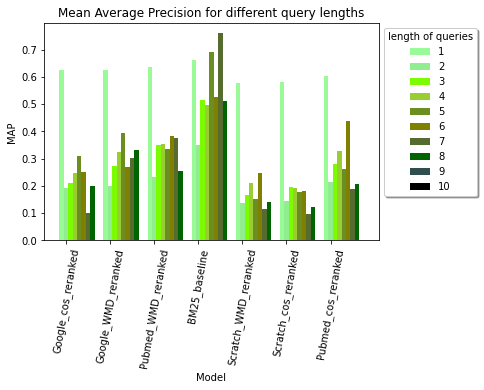

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import glob
import os

# Compute evaluation metrics for different query lengths

def evaluate_query_length(path=None, max_query_length=1):
  query_labels = list(query_labels_from_file(path,max_query_length))
  return MAP(query_labels)

lengths = [1,2,3,4,5,6,7,8,9,10]
names = glob.glob("/content/*.csv")
MAP_list = []
model_names_list = []

for i in lengths:
  MAP_i = []
  model_names = []
  for item in names:
        model_names.append(item.split("/")[-1][:-4])
        score = evaluate_query_length(item,max_query_length = i)
        MAP_i.append(score)

  MAP_list.append(MAP_i)
  model_names_list.append(model_names)

print(MAP_list)
print(model_names_list)

print(MAP_list[0])

MAP_list = [[0.6235472398738997, 0.6247510685007935, 0.6348874840778355, 0.6623718197688621, 0.5781252658892787, 0.5796896440736711, 0.6046490880611738], [0.19185203630651326, 0.20070253822824788, 0.2335844740527547, 0.35154817529128096, 0.13794516046915492, 0.14530523093554315, 0.2137070244847143], [0.2098530052085941, 0.2719865697233576, 0.34929556125292727, 0.515297952694101, 0.1672126096723282, 0.1962486509876309, 0.2788319230785297], [0.24758682923610317, 0.32310005302202405, 0.351967354120808, 0.49850395797561237, 0.20925242110576592, 0.19339774804420434, 0.32824665713865625], [0.3112890293378375, 0.39379009980151786, 0.33549719529042066, 0.6916926706491134, 0.15291112117686215, 0.17703969892704788, 0.2636483404142413], [0.24986324491650358, 0.2696583376279942, 0.3818210764613805, 0.5264766110032207, 0.24696148387995218, 0.1811941433963984, 0.43980631061958997], [0.10088586019525358, 0.30257332885622723, 0.3774090835786766, 0.7598989719588956, 0.11666354191228108, 0.09825970830587501, 0.18975954610384654], [0.20017384765065013, 0.3318206872735976, 0.25285113515934077, 0.5104386029470931, 0.13902848974644905, 0.12149414470286922, 0.2086177548372954], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
model_names_list = [['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked'], ['Google_cos_reranked', 'Google_WMD_reranked', 'Pubmed_WMD_reranked', 'BM25_baseline', 'Scratch_WMD_reranked', 'Scratch_cos_reranked', 'Pubmed_cos_reranked']]


x = np.arange(len(MAP_list[0]))  # the label locations
width = 0.10  # the width of the bars

plt.figure()

plt.bar(x-width, MAP_list[0], width, color='palegreen')
plt.bar(x, MAP_list[1], width, color='lightgreen')
plt.bar(x+1*width, MAP_list[2], width, color='lawngreen')
plt.bar(x+2*width, MAP_list[3], width, color='yellowgreen')
plt.bar(x+3*width, MAP_list[4], width, color='olivedrab')
plt.bar(x+4*width, MAP_list[5], width, color='olive')
plt.bar(x+5*width, MAP_list[6], width, color='darkolivegreen')
plt.bar(x+6*width, MAP_list[7], width, color='darkgreen')
plt.bar(x+7*width, MAP_list[8], width, color='darkslategray')
plt.bar(x+7*width, MAP_list[9], width, color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('MAP')
plt.xlabel('Model')
plt.title('Mean Average Precision for different query lengths')
plt.xticks(x, model_names_list[0], rotation = 80)
plt.legend(lengths,bbox_to_anchor=(1.0, 1.0),shadow=True,title="length of queries")

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

plt.show()



